<h1><center>Introduction to Functional Brain Parcellation</center></h1>
<center><img src="yeo_krienen_7.png" width=750 height=300
    style="padding:0; border:0; display: block;
    margin-left: auto; margin-right: auto"></center>
<center>Pierre Bellec</center>

<center>
    <div id="banner" style="overflow: hidden; justify-content:space-around;">
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_udem.png" width="200px" alt="">
        </div>
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_criugm.png" width="200px" alt="">
        </div>
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_unf.png" width="200px" alt="">
        </div>
    </div>
</center>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="varela2001.png" width="100%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Why parcellations? understand brain organization</center></h1>
        <par>
            Local and distributed connectivity lead to the emergence of both local and distributed neuronal assemblies, also called functional networks. Figures from Varela et al., 2001.
        </par>
    </div>
</div>


<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="graphs_adhd200.png" width="75%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Why parcellations? reduce dimensionality</center></h1>
        <par>
            Parcels can be used as nodes to approximate brain networks as graphs. Here, the average connectome of the ADHD-200 sample is represented with several different parcellations, of varying resolutions. From Bellec et al., Neuroimage 2017.
        </par>
    </div>
</div>

# Code and data

Nilearn code is presented to generate similar figures to most slides in this presentation. To run the code locally, install the dependencies listed in `requirements.txt` and run the following code to cache all the necessary data:

In [1]:
import warnings
warnings.filterwarnings("ignore")

from nilearn import datasets # Fetch data using nilearn
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10) # ADHD200 preprocessed data (Athena pipeline)
atlas_yeo = datasets.fetch_atlas_yeo_2011() # the Yeo-Krienen atlas
fsaverage = datasets.fetch_surf_fsaverage() # The freesurfer surface average

<h1><center>The BOLD signal</center></h1>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="neurovascular.png" width="100%">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <par>
            Vasculature meshes with neuronal population at a very fine spatial scale, (~10 microns), with micro-capilaries regulating blood oxygenation in a highly local and precise way. The Blood Oxygenation-Level Dependent (BOLD) signal in fMRI captures this neurovasculare coupling. Figure adapted from Harrison, 2002 and Dr Bruce Pike. Check this <a href"https://youtu.be/RoKt_c08wxQ?t=111"> lecture</a> for more info.
        </par>
    </div>
</div>


<h1><center>functional Magnetic Resonance Imaging</center></h1>
<par>
fMRI is a 4D imaging modality. Each brain parcel, down to a single volume element (voxel), is associated with a time series.
</par>
<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="fmri_vol.jpg" width="100%">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <img class="img_slide" src="fmri_time_series.png" width="70%">
    </div>
</div>


# Brain parcels

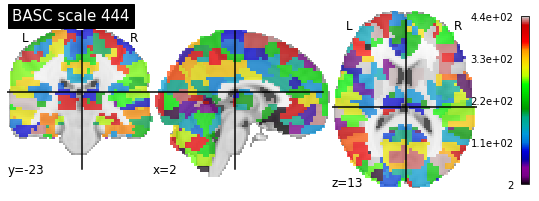

In [2]:
# Let's load some small brain parcels!
from nilearn import plotting, input_data
plotting.plot_roi(basc["scale444"], title="BASC scale 444", colorbar=True, cmap="nipy_spectral")

# Parcel time series extraction

In [3]:
 masker = input_data.NiftiLabelsMasker(
    basc['scale444'], resampling_target="data", detrend=True, standardize=True, smoothing_fwhm=5,
    memory='nilearn_cache', memory_level=1).fit()
tseries = masker.transform(adhd.func[0])
print("Time series with shape {0} (# time points, # parcels))".format(tseries.shape))

Time series with shape (176, 444) (# time points, # parcels))


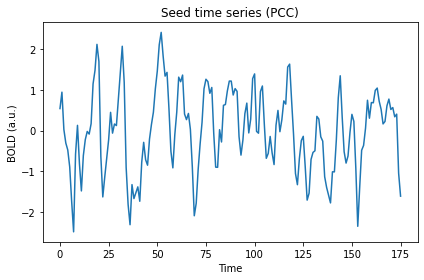

In [4]:
# plot time series for one region 
import matplotlib.pyplot as plt
plt.plot(tseries[:,316])
plt.title('Seed time series (PCC)'), plt.xlabel('Time'), plt.ylabel('BOLD (a.u.)')
plt.tight_layout()

<h1><center>Seed-based connectivity map</center></h1>
<par>
Slow spontaneous fluctuations and seed-based connectivity map from the posterior cingulate cortex identifies the default-mode network. See the following <a href=https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html> nilearn tutorial</a> for more details.
</par>
<center>
<img class="img_slide" src="fig_fcmri.png" width="65%">
</center>

<h1><center>Seed-based connectivity map</center></h1>

In [5]:
# Load voxel-level data 
masker_voxel = input_data.NiftiMasker(t_r=2, detrend=True, standardize=True, smoothing_fwhm=5).fit(adhd.func[0])
tseries_voxel = masker_voxel.transform(adhd.func[0])

print("Time series with shape {0} (# time points, # voxels))".format(tseries_voxel.shape))

Time series with shape (176, 69681) (# time points, # voxels))


In [6]:
# Compute correlation, and look at voxel-based connectivity map
import numpy as np
seed_to_voxel_correlations = (np.dot(tseries_voxel.T, tseries[:, 316]) / tseries.shape[0])

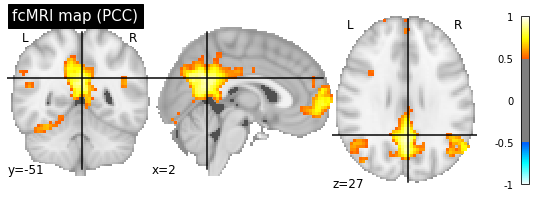

In [7]:
# Show the connectivity map
conn_map = masker_voxel.inverse_transform(seed_to_voxel_correlations.T)
plotting.plot_stat_map(conn_map, cut_coords=(2, -51, 27), threshold=0.5, vmax=1, title="fcMRI map (PCC)")

<h1><center>Functional Connectome</center></h1>
<par>
A functional connectome essentially is a collection of seed-based connectivity maps, approximated (or compressed) on parcels, and using all possible seeds. 
</par>
<center>
<img class="img_slide" src="connectome.png" width="90%">
</center>

<h1><center>Functional Connectome</center></h1>

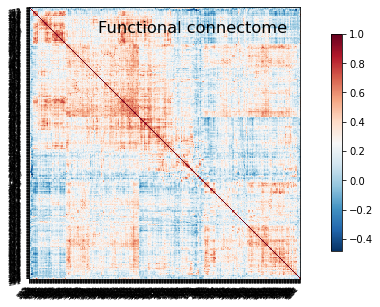

In [8]:
# We generate a connectome 
from nilearn.connectome import ConnectivityMeasure
conn = np.squeeze(ConnectivityMeasure(kind='correlation').fit_transform([tseries]))

# Plot the connectome, with no particular region order
plotting.plot_matrix(conn, labels = range(444), title='Functional connectome', reorder='average')

# Compressed connectivity map

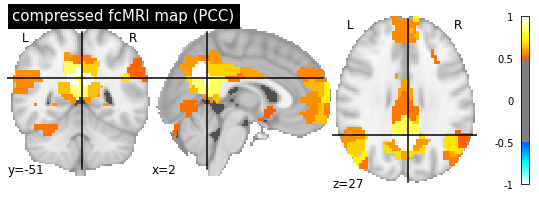

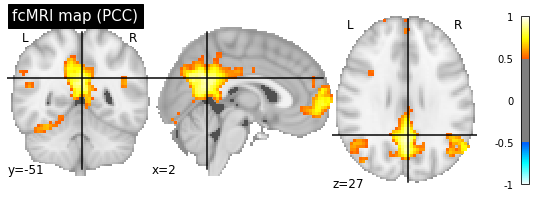

In [9]:
# Let's project back one of the column of the connectome in voxel space
conn_map_compressed = masker.inverse_transform(conn[316, :].reshape([1, 444]))
plotting.plot_stat_map(conn_map_compressed, cut_coords=(2, -51, 27), threshold=0.5, vmax=1, title="compressed fcMRI map (PCC)")
# And let's show the original voxel-based map for comparison
plotting.plot_stat_map(conn_map, cut_coords=(2, -51, 27), threshold=0.5, vmax=1, title="fcMRI map (PCC)")

<h1><center>Functional Networks</center></h1>
<par>
As we ordered the parcels in a data-driven way, we can see functional networks as diagonal squares with high connectivity on the diagonal. Finding these squares (and the order) can be solved with a cluster analysis.
</par>
<center>
<img class="img_slide" src="networks.png" width="90%">
</center>

# Hierarchical cluster analysis 

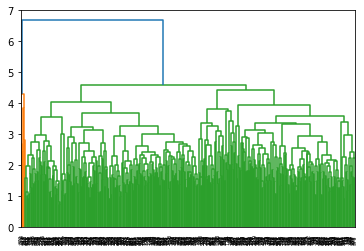

In [10]:
# we use scipy's implementation
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# That's the hierarchical clustering step
hier = linkage(conn, method='average', metric='euclidean') # scipy's hierarchical clustering
# HAC proceeds by iteratively merging brain regions, which can be visualized with a tree
res = dendrogram(hier, get_leaves=True) # Generate a dendrogram from the hierarchy

In [11]:
# the order of merging above give us a good order to visualize the matrix
order = res.get('leaves') # Extract the order on parcels from the dendrogram
print(order[0:10])
# here parcel 372 is the left-most leaf in the tree, then 385, etc

[372, 385, 4, 53, 197, 287, 313, 346, 62, 192]


# Hierarchical cluster analysis

In [12]:
# We can cut the tree at whatever number of clusters we choose (here 17, because 17 is good)
part = np.squeeze(cut_tree(hier, n_clusters=17)) # Cut the hierarchy
# Each entry of the vector part is a parcel, and codes for the number of the network of this parcel
print(part[0:10]) # This means that partel 3 is in network 3. What is the network of parcel 5?

[0 1 2 3 4 5 5 6 7 8]


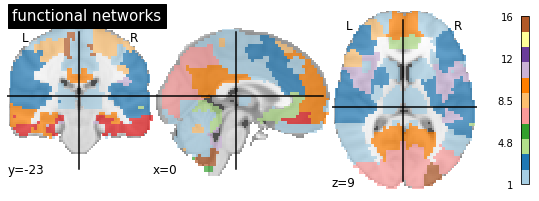

In [13]:
# let's visualize these clusters back in voxel space 
part_img = masker.inverse_transform(part.reshape([1, 444]) + 1) # note the sneaky shift to 1-indexing
plotting.plot_roi(part_img, title="functional networks", colorbar=True, cmap="Paired")

# Hierarchical cluster analysis

In [14]:
# Another way to represent the clusters is an adjacency matrix A
# A(i,j) = 1 if i and j are in the same cluster, and 0 otherwise
def part2adj(part):
    part = np.reshape(part, [part.shape[0], 1])
    adj = np.repeat(part, part.shape[0], 1) == np.repeat(part.transpose(), part.shape[0], 0)
    return adj.astype(int)

(<AxesSubplot:title={'center':'part'}>,
 Text(0.5, 1.0, 'part'))

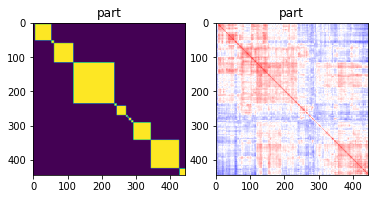

In [15]:
# Let's look at the adjacency matrix
# alongside the connectivity matrix, after reordering
plt.subplot(1,2,1), plt.imshow(part2adj(part[order])), plt.title('part')
plt.subplot(1,2,2), plt.imshow(conn[order, :][:, order], cmap='bwr'), plt.title('part')
# in the adjacency matrix, the clusters are literally squares on the diagonal!

# Hierarchical cluster analysis

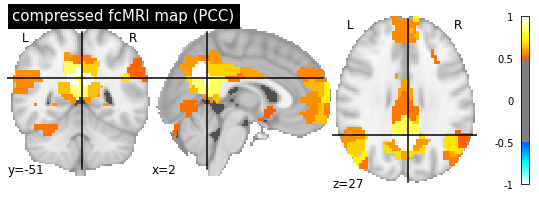

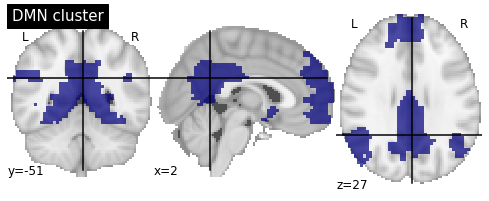

In [16]:
# Let's finally visualize the compressed seed-based PCC map
conn_map_compressed = masker.inverse_transform(conn[316, :].reshape([1, 444]))
plotting.plot_stat_map(conn_map_compressed, cut_coords=(2, -51, 27), threshold=0.5, vmax=1, 
                       title="compressed fcMRI map (PCC)")

# along with the DMN cluster 
part_img = masker.inverse_transform(part.reshape([1, 444]) + 1 == 10) # note the sneaky shift to 1-indexing
plotting.plot_roi(part_img, title="DMN cluster", cut_coords=(2, -51, 27))

<h1><center>Multiresolution parcellations</center></h1>
<par>
<center>
<img class="img_slide" src="fig_multiscale.png" width="70%">
</center>

<h1><center>Golland parcellation (2 clusters)</center></h1>
<par>
Networks can also be merged into reliable “exogeneous” vs “endogeneous” systems. From Golland et al. (2008). </par>
<center>
<img class="img_slide" src="golland2008.png" width="60%">
</center>

# Yeo-Krienen parcellation (7 clusters)
Group cluster analysis of fMRI connectivity (N=1000) using von Mises-Fisher distribution (Lashkari et al., 2010). See Yeo, Krienen et al. (2011) and this [tutorial](http://nilearn.github.io/auto_examples/04_manipulating_images/plot_extract_regions_labels_image.html#sphx-glr-auto-examples-04-manipulating-images-plot-extract-regions-labels-image-py).


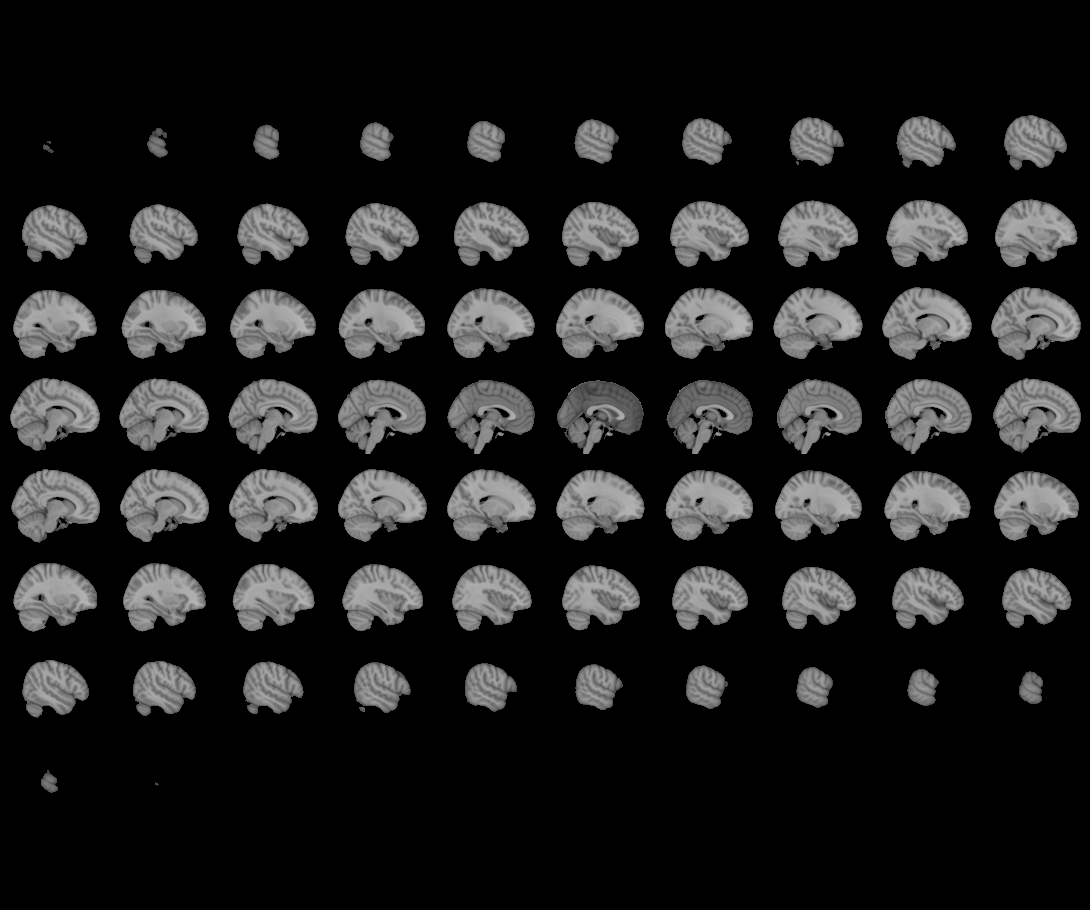
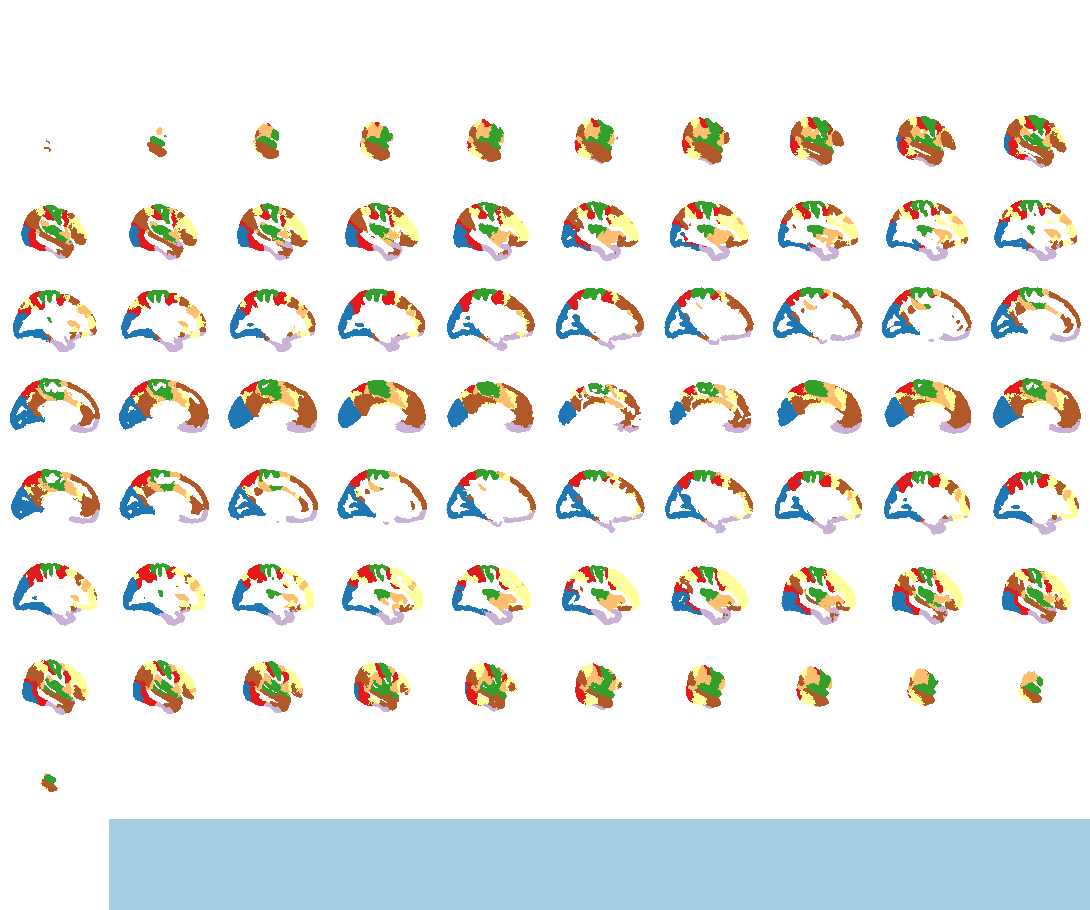

In [24]:
# Let's plot the Yeo-Krienen 7 clusters parcellation
from nilearn import plotting
plotting.view_img(atlas_yeo.thick_7, title='Yeo-Krienen atlas scale 7',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired', symmetric_cmap=False, threshold=0)

# Yeo-Krienen parcellation (17 clusters)
Networks can be further divided into subnetworks, e.g. in the visual cortex. From Yeo, Krienen et al. (2011).


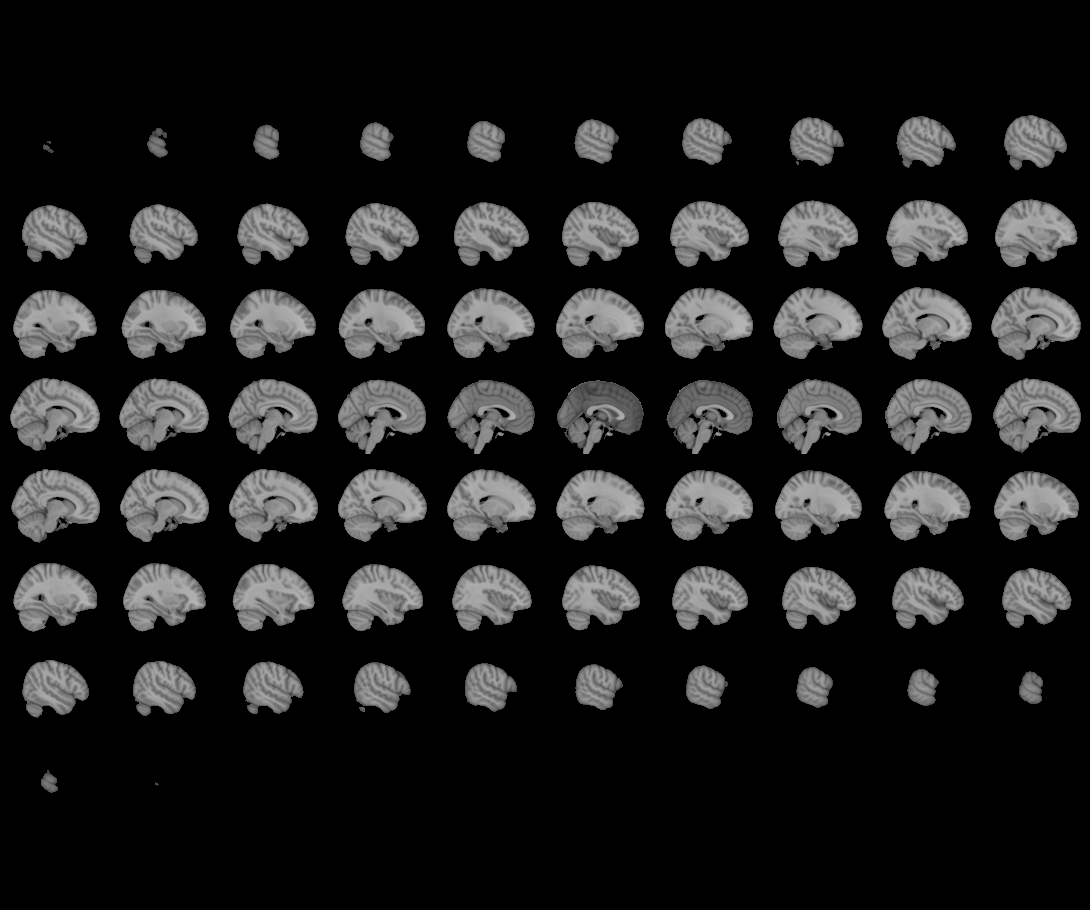
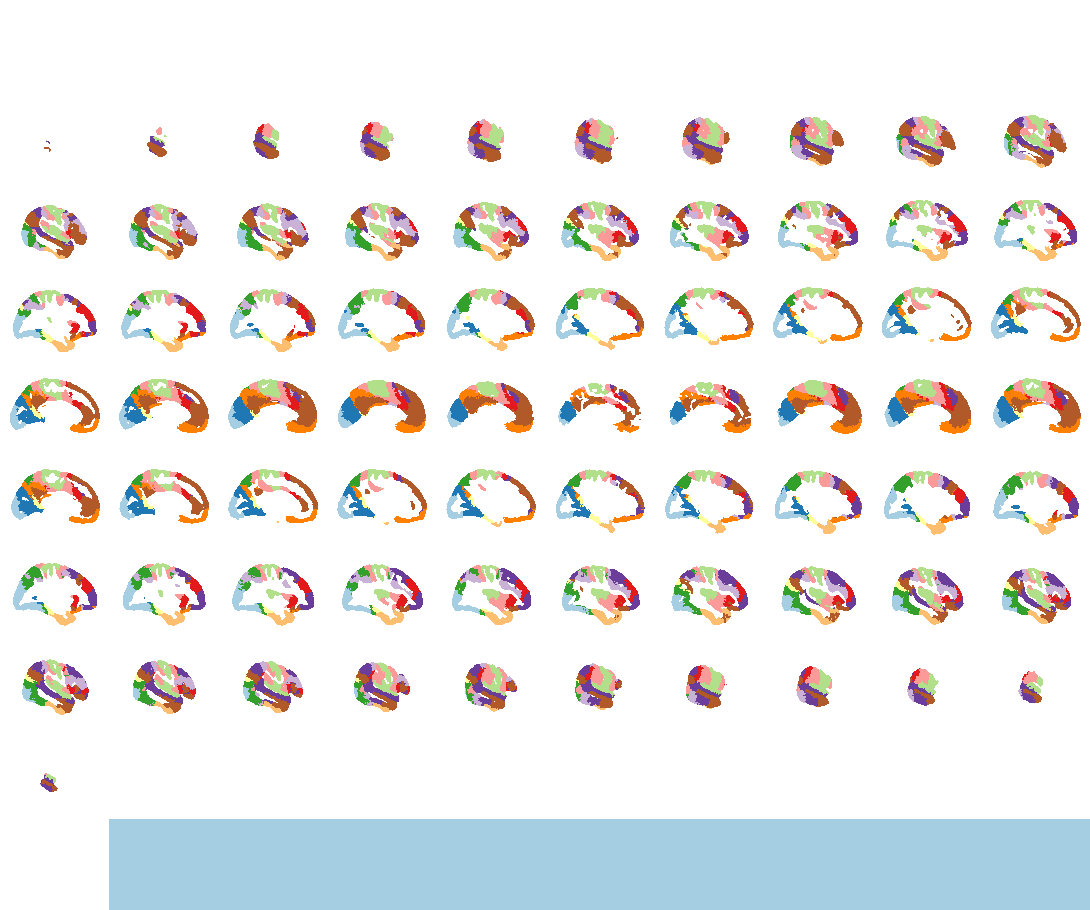

In [25]:
# Let's plot the Yeo-Krienen 7 clusters parcellation
from nilearn import plotting
plotting.view_img(atlas_yeo.thick_17, title='Yeo-Krienen atlas scale 7',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired', symmetric_cmap=False, threshold=0)

# Multiresolution parcellations
Some parcellation atlases explicitely offer a range of resolution, such as the MIST atlas below [(Urchs et al., 2019)](https://mniopenresearch.org/articles/1-3) (see [dashboard](https://simexp.github.io/multiscale_dashboard/index.html)) or the Schaefer atlas [(Schaefer et al., 2018)](https://doi.org/10.1093/cercor/bhx179). 

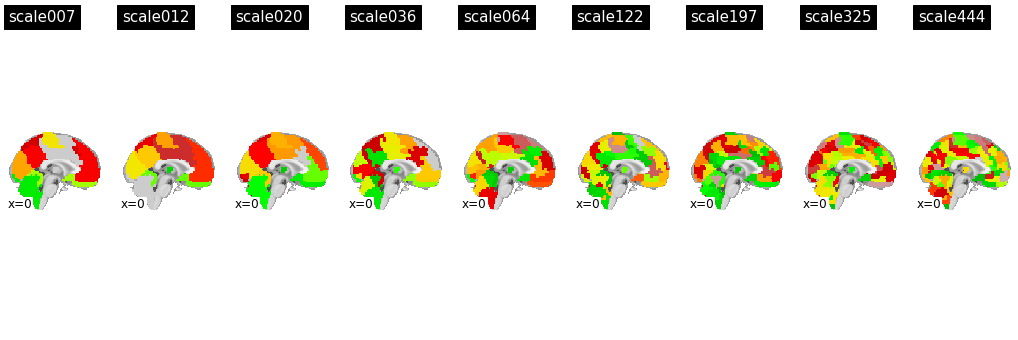

In [19]:
plt.figure(figsize=(18, 6))
for i, scale in enumerate(basc):
    if not scale == 'description':
        plotting.plot_stat_map(basc[scale], display_mode="x", title=scale, cut_coords=(0, ), 
                               colorbar=False, cmap="nipy_spectral", axes=plt.subplot(1, 9, i + 1))

<h1><center>Cluster homogeneity (compression quality)</center></h1>
<par>
Homogeneity of group brain parcels as a function of the average parcel size. Note that homogeneity can closely be predicted from size alone. From Urchs et al. MNI open research (2019).<center>
<img class="img_slide" src="urchs2019.png" width="60%">
</center>

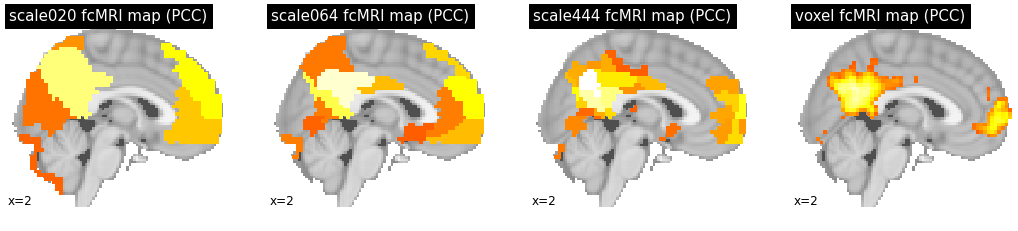

In [21]:
# Let's check qualitatively how compression quality varies with scale.
plt.figure(figsize=(18, 4))
for i, scale in enumerate(("scale020", "scale064", "scale444")):
    masker_scale = input_data.NiftiLabelsMasker(basc[scale], resampling_target="data", detrend=True, 
         standardize=True, smoothing_fwhm=5, memory='nilearn_cache', memory_level=1).fit()
    tseries_scale = masker_scale.transform(adhd.func[0])
    seed_to_voxel_correlations = (np.dot(tseries_scale.T, tseries[:, 316]) / tseries.shape[0])
    conn_map_scale = masker_scale.inverse_transform(seed_to_voxel_correlations.reshape([1, tseries_scale.shape[1]]))
    plotting.plot_stat_map(conn_map_scale, display_mode='x', cut_coords=(2, ), threshold=0.5, vmax=1, 
                       title=f"{scale} fcMRI map (PCC)", axes=plt.subplot(1, 4, i + 1), colorbar=False)
plotting.plot_stat_map(conn_map, display_mode='x', cut_coords=(2, ), threshold=0.5, vmax=1, 
    title="voxel fcMRI map (PCC)", axes=plt.subplot(1, 4, 4), colorbar=False)

<h1><center>Group reproducibility</center></h1>
With large, homogeneous groups, group-level parcellations reproduce closely. Figure adapted from Yeo, Krienen et al. 2011.
<center>
<img class="img_slide" src="repro_yeo_krienen.png" width="80%">
</center>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="fig_gordon2017.png" width="60%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Individual parcels</center></h1>
        <par>
            For ten densely sampled individuals (10 runs of 30 mns resting-state over ten days) identify details in individual parcellations that cannot be observed at the level of group parcellations (indicated by arrows, group parcellation at the top). 
        </par>
    </div>
</div>

<div class="row content">
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Individual reproducibility</center></h1>
        <par>
            For ten densely sampled individuals (10 runs of 30 mns resting-state over ten days) identify details in individual parcellations that cannot be observed at the level of group parcellations (indicated by arrows, group parcellation at the top). 
        </par>
    </div>
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class="img_slide" src="repro_gordon2017.png" width="60%" alt="">
    </div>
    
</div>